In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [27]:
df = pd.read_csv("ExportedData/cleanCMURevenueAdjusted.tsv", sep="\t")
df = pd.read_csv("ExportedData/cleanCMURevenueAdjusted.tsv", sep="\t")

df["Languages"] = df["Languages"].apply(lambda x: eval(x))
df["Languages"] = df[df["Languages"].map(len) > 0]["Languages"]

df["Genres"] = df["Genres"].apply(lambda x: eval(x))
df["Genres"] = df[df["Genres"].map(len) > 0]["Genres"]

df["Countries"] = df["Countries"].apply(lambda x: eval(x))
df["Countries"] = df[df["Countries"].map(len) > 0]["Countries"]

df = df.dropna()
df.head()

,WikiID,Name,Revenue,ReleaseDate,Languages,Countries,Genres,Summary,Year,AdjustedRevenue
0,975900,Ghosts of Mars,14010832.0,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",2001.0,2.022468e+07
5,171005,Henry V,10161099.0,1989-11-08,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989.0,2.093678e+07
8,77856,Mary Poppins,102272727.0,1964-08-27,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",The film opens with Mary Poppins perched in a...,1964.0,8.429252e+08
12,156558,Baby Boy,29381649.0,2001-06-27,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",A young 20-year-old named Jody lives with his...,2001.0,4.241249e+07
22,261237,The Gods Must Be Crazy,34331783.0,1980,"[Afrikaans Language, English Language]",[South Africa],"[Adventure, Action/Adventure, Indie, World cin...",The film is a collision of three separate stor...,1980.0,1.066477e+08


In [10]:
len(df)

7295

(array([0.0001119 , 0.00069939, 0.0017205 , 0.00461597, 0.00454603,
        0.00288148, 0.0065183 , 0.01824006, 0.02579346, 0.03691374]),
 array([1914. , 1923.8, 1933.6, 1943.4, 1953.2, 1963. , 1972.8, 1982.6,
        1992.4, 2002.2, 2012. ]),
 <a list of 10 Patch objects>)

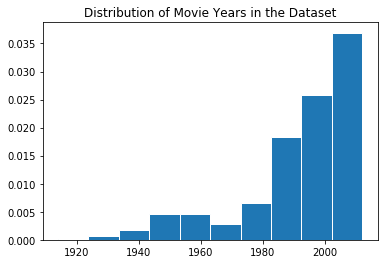

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Distribution of Movie Years in the Dataset")
ax.hist(df["Year"].values, density=True, edgecolor='white')

Text(0.5, 1.0, 'Proportion of Countries in the Dataset')

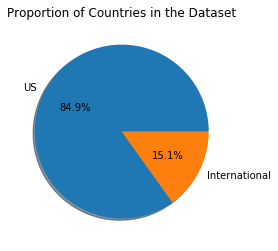

In [24]:
numUs = 0
for cList in df["Countries"]:
    isUS = False
    for country in cList:
        if country == "United States of America":
            isUS = True
    if isUS:
        numUs += 1

numUs = numUs / len(df)
numNot = 1 - numUs
        
fig, ax = plt.subplots(figsize=(6,4))
ax.pie([numUs,numNot], labels=["US","International"], autopct='%1.1f%%', shadow=True)
ax.set_title("Proportion of Countries in the Dataset")

Text(0.5, 1.0, 'Proportion of Languages in the Dataset')

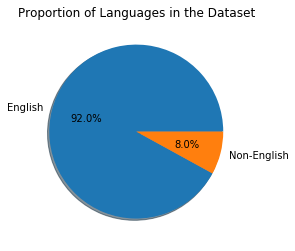

In [30]:
numEng = 0
englishes = set(['American English', 'English Language'])

for lList in df["Languages"]:
    isEng = False
    for lang in lList:
        if lang in englishes:
            isEng = True
            break
    if isEng:
        numEng += 1

numEng = numEng / len(df)
numNot = 1 - numEng
        
fig, ax = plt.subplots(figsize=(6,4))
ax.pie([numEng,numNot], labels=["English","Non-English"], autopct='%1.1f%%', shadow=True)
ax.set_title("Proportion of Languages in the Dataset")